In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\akash\Desktop\Decision Tree\Dataset\decision_tree_dataset_3000.csv")
df.head()


,Age,Salary,Experience,Education_Level,Purchased
0,22,73478,22,0,0
1,43,109255,29,1,1
2,21,40588,5,0,0
3,37,55125,25,1,0
4,41,117085,21,2,1


In [3]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (2400, 4)
Testing data: (600, 4)


In [5]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)
print("Model trained successfully ✅")


Model trained successfully ✅


In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [7]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[390   0]
 [  0 210]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       210

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



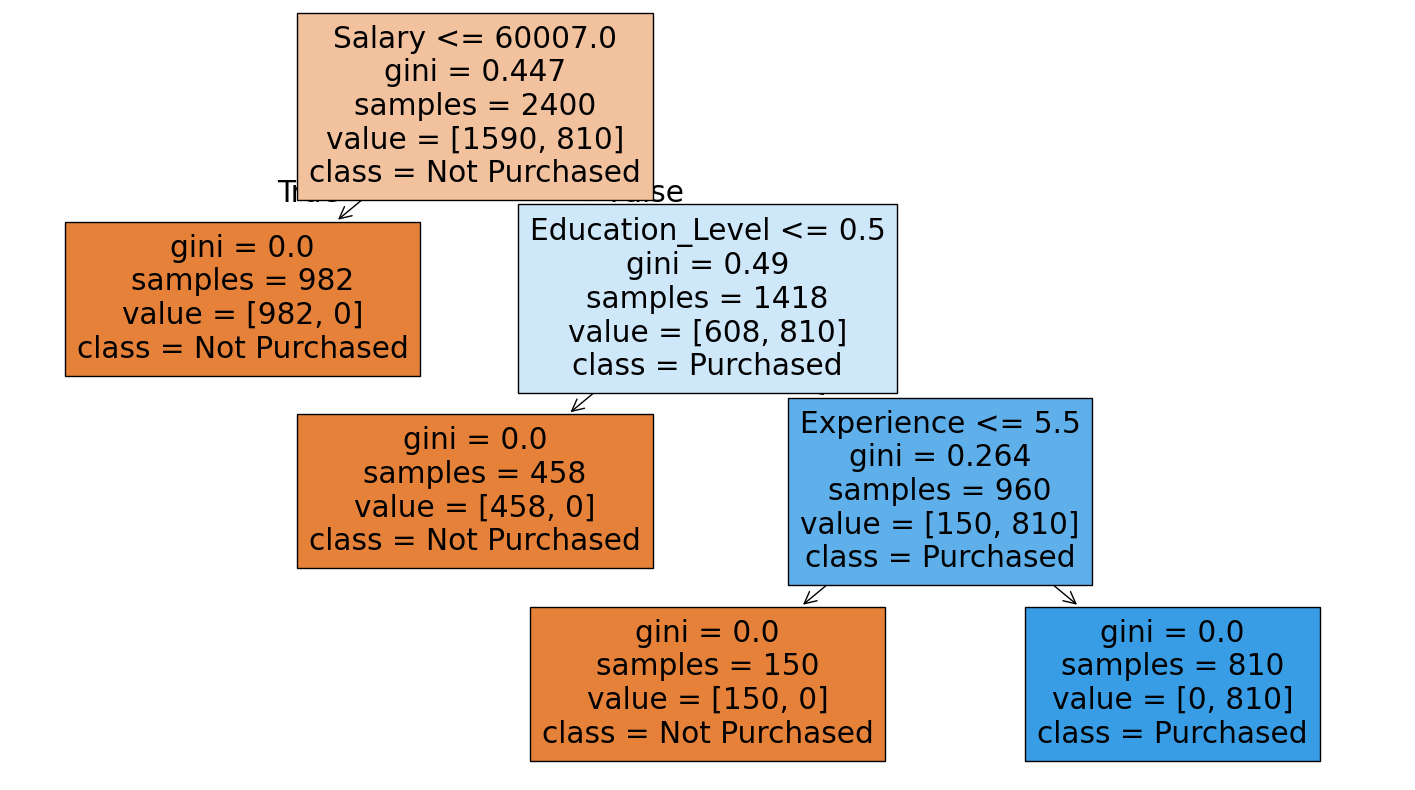

In [8]:
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Purchased", "Purchased"],
    filled=True
)
plt.show()


In [9]:
new_data = pd.DataFrame({
    "Age": [35],
    "Salary": [70000],
    "Experience": [8],
    "Education_Level": [1]
})

prediction = model.predict(new_data)
print("Prediction:", "Purchased" if prediction[0] == 1 else "Not Purchased")


Prediction: Purchased


In [10]:
import joblib

joblib.dump(model, "decision_tree_model.pkl")
print("Model saved as decision_tree_model.pkl ✅")


Model saved as decision_tree_model.pkl ✅
